In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive 
drive.mount('/mntDrive') 
!ls "/mntDrive/My Drive/Colab Notebooks"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /mntDrive
Introduction-To-Data-PreProcessing.ipynb  pima1.csv


In [0]:
df=pd.read_csv('/mntDrive/My Drive/Colab Notebooks/pima1.csv')

In [4]:
df

,pregnancy,plasma_glucose,distolic_bp,skin_thick,insuline,BMI,pedigree_fn,age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [5]:
df.describe()

,pregnancy,plasma_glucose,distolic_bp,skin_thick,insuline,BMI,pedigree_fn,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [6]:
df.head()

,pregnancy,plasma_glucose,distolic_bp,skin_thick,insuline,BMI,pedigree_fn,age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [7]:
df.columns

Index(['pregnancy', 'plasma_glucose', 'distolic_bp', 'skin_thick', 'insuline',
       'BMI', 'pedigree_fn', 'age', 'Diabetes'],
      dtype='object')

In [8]:
print("Diabetes data set dimensions : {}".format(df.shape))

Diabetes data set dimensions : (768, 9)


In [9]:
df.groupby('Diabetes').size()

Diabetes
tested_negative    500
tested_positive    268
dtype: int64

Diabetes
tested_negative    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
tested_positive    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

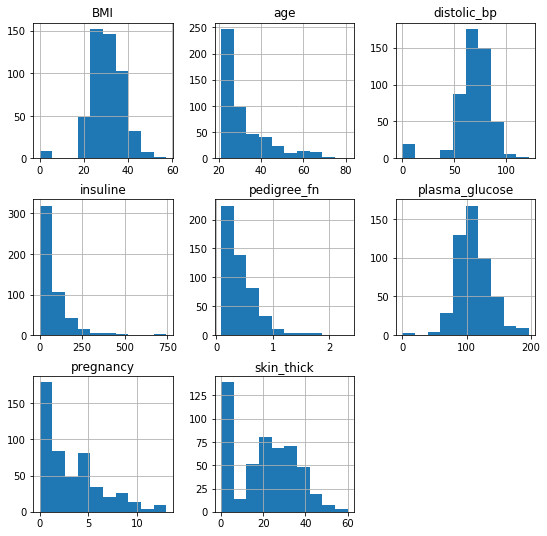

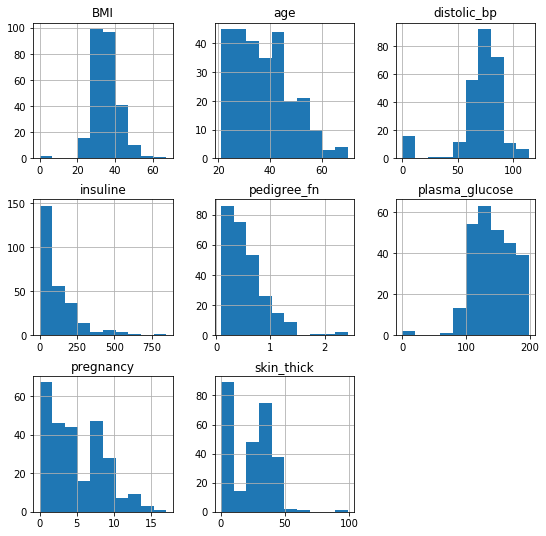

In [10]:
df.groupby('Diabetes').hist(figsize=(9, 9))

In [11]:
df.isnull().sum()

pregnancy         0
plasma_glucose    0
distolic_bp       0
skin_thick        0
insuline          0
BMI               0
pedigree_fn       0
age               0
Diabetes          0
dtype: int64

In [12]:
df.isna().sum()

pregnancy         0
plasma_glucose    0
distolic_bp       0
skin_thick        0
insuline          0
BMI               0
pedigree_fn       0
age               0
Diabetes          0
dtype: int64

In [13]:
df.isnull().values.any()

False

In [14]:
(df.pregnancy==0).sum(), (df.distolic_bp==0).sum()

(111, 35)

In [16]:
print("total zero in BMI :",df[df.BMI==0].shape[0])

total zero in BMI : 11


In [17]:
print(df[df.BMI==0].groupby('Diabetes')['BMI'].count())

Diabetes
tested_negative    9
tested_positive    2
Name: BMI, dtype: int64


In [18]:
z_field=['plasma_glucose','distolic_bp','skin_thick','insuline','BMI']
df.non_zero=df.copy()
df[z_field]=df[z_field].replace(0,np.nan)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,pregnancy,plasma_glucose,distolic_bp,skin_thick,insuline,BMI,pedigree_fn,age,Diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,tested_positive
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,tested_negative
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,tested_positive
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,tested_negative
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,tested_negative
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,tested_negative
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,tested_negative
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,tested_positive


In [19]:
df[z_field]=df[z_field].fillna(df.non_zero.mean())
df.describe()

,pregnancy,plasma_glucose,distolic_bp,skin_thick,insuline,BMI,pedigree_fn,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [20]:
modi_df=df[(df.BMI!=0) & (df.distolic_bp!=0) & (df.plasma_glucose!=0) & (df.skin_thick!=0)]
print(modi_df.shape)

(768, 9)


In [0]:
df.at[0, 'pregnancy'] = 200 #Changing the value in a particular cell

In [22]:
df.head()

,pregnancy,plasma_glucose,distolic_bp,skin_thick,insuline,BMI,pedigree_fn,age,Diabetes
0,200,148.0,72.0,35.000000,79.799479,33.6,0.627,50,tested_positive
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,tested_negative
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,tested_positive
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,tested_negative
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,tested_positive


<function matplotlib.pyplot.show>

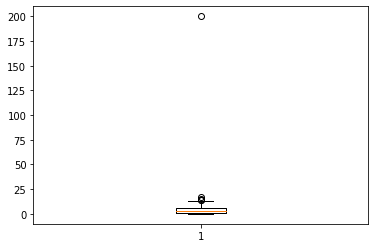

In [23]:
#Checking for outliers (Method 1)
plt.boxplot(df['pregnancy'])
plt.show

In [24]:
#Method 2
Q1, Q3 = df.quantile(0.25), df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

pregnancy          1.000000
plasma_glucose    99.750000
distolic_bp       64.000000
skin_thick        20.536458
insuline          79.799479
BMI               27.500000
pedigree_fn        0.243750
age               24.000000
Name: 0.25, dtype: float64
pregnancy           6.00000
plasma_glucose    140.25000
distolic_bp        80.00000
skin_thick         32.00000
insuline          127.25000
BMI                36.60000
pedigree_fn         0.62625
age                41.00000
Name: 0.75, dtype: float64
pregnancy          5.000000
plasma_glucose    40.500000
distolic_bp       16.000000
skin_thick        11.463542
insuline          47.450521
BMI                9.100000
pedigree_fn        0.382500
age               17.000000
dtype: float64


In [25]:
lower, upper = Q1 - (1.5*IQR), Q3 + (1.5*IQR)
print((df<lower) | (df>upper))

       BMI  Diabetes    age  ...  plasma_glucose  pregnancy  skin_thick
0    False     False  False  ...           False       True       False
1    False     False  False  ...           False      False       False
2    False     False  False  ...           False      False       False
3    False     False  False  ...           False      False       False
4    False     False  False  ...           False      False       False
..     ...       ...    ...  ...             ...        ...         ...
763  False     False  False  ...           False      False       False
764  False     False  False  ...           False      False       False
765  False     False  False  ...           False      False       False
766  False     False  False  ...           False      False       False
767  False     False  False  ...           False      False       False

[768 rows x 9 columns]


#Rescale the data

scale the entire data set in the range of 0 and 1

the formula is : scaled_value = (value - min) / (max - min)

In [0]:
import scipy as sc
from sklearn.preprocessing import MinMaxScaler

In [27]:
array=df.values
array

array([[200, 148.0, 72.0, ..., 0.627, 50, 'tested_positive'],
       [1, 85.0, 66.0, ..., 0.35100000000000003, 31, 'tested_negative'],
       [8, 183.0, 64.0, ..., 0.672, 32, 'tested_positive'],
       ...,
       [5, 121.0, 72.0, ..., 0.245, 30, 'tested_negative'],
       [1, 126.0, 60.0, ..., 0.349, 47, 'tested_positive'],
       [1, 93.0, 70.0, ..., 0.315, 23, 'tested_negative']], dtype=object)

In [28]:
x=array[:,0:8]
x
y=array[:,8]
y
s=MinMaxScaler(feature_range=(0,1))
scaled_x=s.fit_transform(x)
print(scaled_x)
np.set_printoptions(precision=3)
print(scaled_x)

[[1.         0.67096774 0.48979592 ... 0.31492843 0.23441503 0.48333333]
 [0.005      0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.04       0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 ...
 [0.025      0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.005      0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.005      0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]
[[1.    0.671 0.49  ... 0.315 0.234 0.483]
 [0.005 0.265 0.429 ... 0.172 0.117 0.167]
 [0.04  0.897 0.408 ... 0.104 0.254 0.183]
 ...
 [0.025 0.497 0.49  ... 0.164 0.071 0.15 ]
 [0.005 0.529 0.367 ... 0.243 0.116 0.433]
 [0.005 0.316 0.469 ... 0.249 0.101 0.033]]


#Standardize Data

Convert the data such that its mean will be 0 and standard deviation will be 1

The formula required are:

    mean = sum(values) / total_values
    stdev = sqrt( (value_i - mean)^2 / (total_values-1))
    standardized_value = (value - mean) / stdev


In [29]:
from sklearn.preprocessing import StandardScaler
s1 = StandardScaler().fit(x)
standard_x=s.transform(x)
np.set_printoptions(precision=3)
print(standard_x)

[[1.    0.671 0.49  ... 0.315 0.234 0.483]
 [0.005 0.265 0.429 ... 0.172 0.117 0.167]
 [0.04  0.897 0.408 ... 0.104 0.254 0.183]
 ...
 [0.025 0.497 0.49  ... 0.164 0.071 0.15 ]
 [0.005 0.529 0.367 ... 0.243 0.116 0.433]
 [0.005 0.316 0.469 ... 0.249 0.101 0.033]]


#Normalize data

L2 Normalization

where in every row, the sum of square will be 1

In [30]:
from sklearn.preprocessing import Normalizer
d=Normalizer(norm='l2').fit(x)
normalized_x=d.transform(x)
np.set_printoptions(precision=2)
print(normalized_x)
sum(np.square(normalized_x[0,0:8]))

[[0.71 0.53 0.26 ... 0.12 0.   0.18]
 [0.01 0.59 0.46 ... 0.19 0.   0.22]
 [0.04 0.85 0.3  ... 0.11 0.   0.15]
 ...
 [0.03 0.65 0.39 ... 0.14 0.   0.16]
 [0.01 0.74 0.35 ... 0.18 0.   0.27]
 [0.01 0.62 0.47 ... 0.2  0.   0.15]]


0.9999999999999999

#Binarize Data

All values above the threshold are marked 1 and all equal to or below are marked as 0.

In [31]:
from sklearn.preprocessing import Binarizer
b = Binarizer(threshold=0.0).fit(x)
binary_x = b.transform(x)
print(binary_x)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
